In [80]:
import pandas as pd
import numpy as np

In [134]:
# 1 Show DataFrame info.

customer = pd.read_csv('marketing_customer_analysis.csv')
customer

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [86]:
# 2 Describe DataFrame.

customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [105]:
# 3 Show a plot of the total number of responses.

# As the data is categorical, I´d like to create a pie chart to see the proportions.

# I need 2 lists of the data in the same order. One with yes/no, and other one with the counts.

# Calculate the counts
customer['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

<BarContainer object of 2 artists>

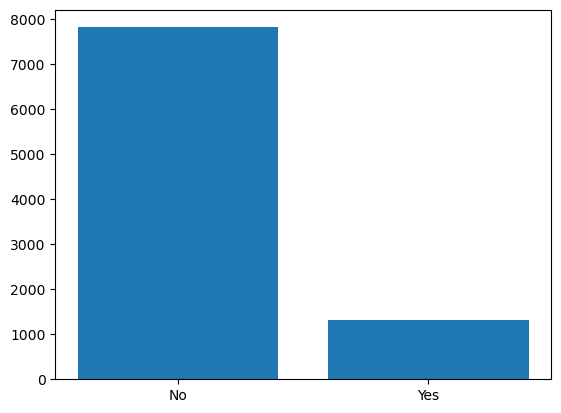

In [123]:
# Create the lists

responses = ['No', 'Yes']
counts = [7826, 1308]

# Show the plot

import matplotlib.pyplot as plt

plt.bar(responses, counts)

In [162]:
# 4 Show a plot of the response rate by the sales channel

# Add new column with the converted response to 0s and 1s
customer['Response2'] = customer['Response'].map({'No': 0, 'Yes': 1})
customer

response_0 = customer[(customer['Response2']==0)]
response_1 = customer[(customer['Response2']==1)]

response_0['Sales Channel'].value_counts()


Agent          2811
Branch         2273
Call Center    1573
Web            1169
Name: Sales Channel, dtype: int64

In [164]:
response_1['Sales Channel'].value_counts()

Agent          666
Branch         294
Call Center    192
Web            156
Name: Sales Channel, dtype: int64

In [168]:
rate1=(response_1['Sales Channel'].value_counts())/((response_0['Sales Channel'].value_counts())+(response_1['Sales Channel'].value_counts()))
rate1

Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Sales Channel, dtype: float64

<BarContainer object of 4 artists>

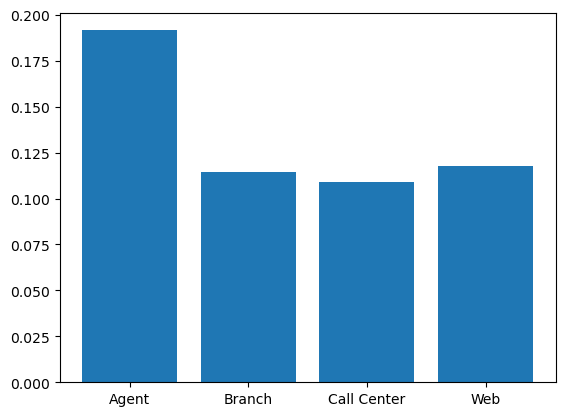

In [173]:
sales_channel = ['Agent', 'Branch', 'Call Center', 'Web']
rate1 = [0.191544, 0.114531, 0.108782, 0.117736]

plt.bar(sales_channel, rate1)

In [ ]:
# I will do this tomorrow
Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.